<a href="https://colab.research.google.com/github/Marieke-do/Assignment---Shark-Attack/blob/main/Assignment_shark_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

url = 'https://raw.githubusercontent.com/Marieke-do/Assignment---Shark-Attack/main/attacks.csv'

df = pd.read_csv(url, encoding='latin-1')
# display(df)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [327]:
# Drop unnecessary columns and rename remainders
print(df.columns)
df1 = df.drop(columns=['Case Number', 'Location', 'Name', 'Time', 'Investigator or Source', 'pdf', 'href formula', 'href','Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22','Unnamed: 23'])

df2 = df1.rename(columns={'Sex ': 'Sex', 'Species ': 'Species' })
df2.columns
# display(df1)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N)', 'Species'],
      dtype='object')

In [328]:
# There seem to be a lot of rows where all data is missing, so let's drop those.
df3 = df2.dropna(how = 'all')
display(df3)

Date    Year  ... Fatal (Y/N)          Species
0     25-Jun-2018  2018.0  ...           N      White shark
1     18-Jun-2018  2018.0  ...           N              NaN
2     09-Jun-2018  2018.0  ...           N              NaN
3     08-Jun-2018  2018.0  ...           N        2 m shark
4     04-Jun-2018  2018.0  ...           N  Tiger shark, 3m
...           ...     ...  ...         ...              ...
6297  Before 1903     0.0  ...           Y              NaN
6298  Before 1903     0.0  ...           Y              NaN
6299    1900-1905     0.0  ...           Y              NaN
6300    1883-1889     0.0  ...           Y              NaN
6301    1845-1853     0.0  ...           Y              NaN

[6302 rows x 11 columns]

In [329]:
# Percentage missing data per column

def average_missing(df, column):
  percentage_average_missing = df.loc[:, column].isnull().mean() * 100
  print(f'The percentage of missing values in {column} is {percentage_average_missing}.')

for column in df3.columns:
  average_missing(df3, column)

# The columns with highest percentage of missing data are: 'Age' and 'Species'  

The percentage of missing values in Date is 0.0.
The percentage of missing values in Year is 0.031735956839098696.
The percentage of missing values in Type is 0.06347191367819739.
The percentage of missing values in Country is 0.7933989209774674.
The percentage of missing values in Area is 7.219930180894954.
The percentage of missing values in Activity is 8.632180260234847.
The percentage of missing values in Sex is 8.965407807045382.
The percentage of missing values in Age is 44.92224690574421.
The percentage of missing values in Injury is 0.4443033957473818.
The percentage of missing values in Fatal (Y/N) is 8.5528403681371.
The percentage of missing values in Species is 45.03332275468105.


In [330]:
# Functions for finding non default missing values

def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)

def column_datatype(df, column):
  dtype = df[column].dtypes
  print(f'The datatype for {column} is {dtype}')  

def unique_values(df, column):
  max_unique_values = 300
  number_of_unique_values = len(df.loc[:,column].unique())

  print(f"The number of unique values in {column} is {number_of_unique_values}.")

  if number_of_unique_values <= max_unique_values:
    try:
      display(np.sort(df.loc[:,column].unique()))
    except TypeError as error:
      print(f'List of unique values could not be sorted: {error}')
      display(df.loc[:,column].unique())

def sorted_head_tail(df, column):
  try:
    sorted = df.loc[:,column].sort_values()
    display(sorted.head(n=10))
    display(sorted.tail(n=10))
    sum_of_null= (df.loc[:,column].isnull().sum())
    print(f'The number of NULL values is {sum_of_null}.')
  except TypeError as error:
    print(f'Could not be sorted: {error}')
    print("..so let's try filtering NULL values and then sorting")
    non_null_uniques = df.loc[~df[column].isnull(), column].unique()
    non_null_sorted = np.sort(non_null_uniques)
    display(non_null_sorted)     
    # display(non_null_sorted[-10:])

def cast_to_type(df, column, type):
  try:
    df.loc[:,column].astype(type)
    print(f'Casting \"{column}\" to \"{type}\" was succesful')
  except ValueError as error :
    print(f'Could {column} not cast to {type}.')

def looking_at_frequencies(df, column):
  display(df.loc[:,column].value_counts(dropna=False))

def find_non_default_missing_values(df, column, type):

  print_separator("*", 80, f"Finding non default missing values for column \"{column}\"")

  column_datatype(df, column)

  # Looking at unique values
  print_separator("-", 40, "1: Looking at unique values")
  unique_values(df, column)

  # Looking at edges
  print_separator("-", 40, "2: Sorting and looking at the edges")
  sorted_head_tail(df, column)

  # Cast to type
  print_separator("-", 40, f"3: Casting to type: {type}")
  cast_to_type(df, column, type)

  # Looking at frequencies
  print_separator("-", 40, "4: Looking at frequencies")
  looking_at_frequencies(df, column)





In [331]:
# Question 1: what are the most dangerous type of sharks to humans?
# Necessary data: number of attacks (= number of rows) and species
# 'Species' column:

find_non_default_missing_values(df3, 'Species', 'string')




********************************************************************************
Finding non default missing values for column "Species"
********************************************************************************
The datatype for Species is object


----------------------------------------
1: Looking at unique values
----------------------------------------
The number of unique values in Species is 1550.


----------------------------------------
2: Sorting and looking at the edges
----------------------------------------


3622                                                     
5555                                                     
1357                                                     
1348                                                     
1454                                                     
2400                                                     
3907     "gummy" shark (Rhizoprionodon or Loxodon) 1.2...
2902                               1.5 m [5'] dusky shark
203                                        6' to 8' shark
3790     Blacktip shark, C. maculipinnis. 1.9 m to 2.1...
Name: Species, dtype: object

6288    NaN
6289    NaN
6290    NaN
6291    NaN
6292    NaN
6297    NaN
6298    NaN
6299    NaN
6300    NaN
6301    NaN
Name: Species, dtype: object

The number of NULL values is 2838.


----------------------------------------
3: Casting to type: string
----------------------------------------
Casting "Species" to "string" was succesful


----------------------------------------
4: Looking at frequencies
----------------------------------------


NaN                                                         2838
White shark                                                  163
Shark involvement prior to death was not confirmed           105
Invalid                                                      102
Shark involvement not confirmed                               88
                                                            ... 
Shark involvement prior to death could not be determined       1
3 m to 4 m shark                                               1
Lemon shark, 6'                                                1
Grey reef shark, 1.5 m                                         1
White shark, 3.9 m, 550 kg, male                               1
Name: Species, Length: 1550, dtype: int64

In [332]:
# Clean up and transform 'Species' column
# Unknown and uncertain observations are not useful for this question. 
# This might cause a bias if (a) certain species is/are not recognised more often than other species.

# Remove null values

df4 = df3.dropna(subset=['Species'], how='all')
# display (df4)

# Remove empty strings

df4 = df4[df4["Species"] != ' ']

# Remove strings with 'unknown'/'?'/'possibly'/'thought'/'not confirmed'/'unconfirmed'/'invalid'/'questionable/'no shark'
df5 = df4[~df4['Species'].str.contains('unknown|\?|possib|though|not confirmed|unconfirmed|invalid|questionable|no shark|unidentified', case=False)]
# display(df5)

# Remove strings with the exact word 'or' (because also unknown which species)
df6= df5[~df5['Species'].str.contains(r'\bor\b')]
# display(df6)

# Find out what last two empty strings are
display(df6.loc[1853, 'Species'])
display(df6.loc[1874, 'Species'])

# Remove rows with '\xa0 '
df7= df6[~df6['Species'].str.contains('\xa0 ')]
display(df7)

# Check top50 frequencies to get an idea
def looking_at_frequencies_top50(df, column):
  display(df.loc[:,column].value_counts(dropna=False).head(50))
looking_at_frequencies_top50(df7, 'Species')


'\xa0 '

'\xa0 '

Date    Year  ... Fatal (Y/N)          Species
0                 25-Jun-2018  2018.0  ...           N      White shark
3                 08-Jun-2018  2018.0  ...           N        2 m shark
4                 04-Jun-2018  2018.0  ...           N  Tiger shark, 3m
6                 03-Jun-2018  2018.0  ...           Y      Tiger shark
7                 27-May-2018  2018.0  ...           N  Lemon shark, 3'
...                       ...     ...  ...         ...              ...
6274  A few years before 1938     0.0  ...           N      White shark
6276              Early 1930s     0.0  ...           Y  12' tiger shark
6293              Before 1906     0.0  ...           Y     Blue pointer
6294              Before 1906     0.0  ...           Y     Blue pointer
6295              Before 1906     0.0  ...           Y    Blue pointers

[2736 rows x 11 columns]

White shark                        163
Tiger shark                         73
Bull shark                          52
4' shark                            40
6' shark                            40
1.8 m [6'] shark                    35
1.5 m [5'] shark                    32
1.2 m [4'] shark                    27
3' shark                            26
5' shark                            26
2 m shark                           25
4' to 5' shark                      24
3 m [10'] shark                     22
Wobbegong shark                     21
3' to 4' shark                      18
3 m shark                           17
2.4 m [8'] shark                    16
3.7 m [12'] shark                   15
12' shark                           15
Blacktip shark                      15
Blue shark                          14
1.2 m to 1.5 m [4' to 5'] shark     14
1.5 m shark                         13
Mako shark                          13
7' shark                            13
"a small shark"          

In [333]:
# Replace comma with space
df7['Species'] = df7['Species'].str.replace(',', '')
df7['Species'] = df7['Species'].str.replace('"', '')

# Transform 'Species' columns with correct species names (stripped from other irrelevant information)
# To do this I have gathered a lot of information on sharks.org / wikipedia etc. to group sharks 

def replace_species(df, column, substring, replacement):
  mask = df[column].str.contains(substring)
  df.loc[mask, column] = replacement

replace_species(df7, 'Species', 'White shark|white shark', 'White Shark')
replace_species(df7, 'Species', r'\bTiger shark\b|\btiger shark\b', 'Tiger Shark')
replace_species(df7, 'Species', 'Bull shark|bull shark', 'Bull Shark')
replace_species(df7, 'Species', 'Wobbegong|wobbegong', 'Wobbegong Shark')
replace_species(df7, 'Species', 'Blacktip shark|blacktip shark', 'Blacktip Shark')
replace_species(df7, 'Species', 'Sand tiger shark|sand tiger shark|Sandtiger shark|sandtiger shark|Sand shark|sand shark|Raggedtooth shark|raggedtooth shark|Grey nurse|grey nurse', 'Sand Tiger Shark')
replace_species(df7, 'Species', 'Nurse shark|nurse shark', 'Nurse Shark')
replace_species(df7, 'Species', 'Blue shark|blue shark', 'Blue Shark')
replace_species(df7, 'Species', 'Mako shark|mako shark|Blue pointer|blue pointer', 'Mako Shark') # could be shortfin or longfin mako shark
replace_species(df7, 'Species', 'Bronze whaler shark|bronze whaler shark', 'Bronze Whaler Shark')
replace_species(df7, 'Species', 'Zambesi shark|zambesi shark', 'Zambesi Shark')
replace_species(df7, 'Species', 'Hammerhead shark|hammerhead shark', 'Hammerhead Shark')
replace_species(df7, 'Species', 'Lemon shark|lemon shark', 'Lemon Shark')
replace_species(df7, 'Species', 'Whitetip reef shark|whitetip reef shark|white-tipped reef shark', 'Whitetip Reef Shark')
replace_species(df7, 'Species', 'Hammerhead|hammerhead', 'Hammerhead Shark')
replace_species(df7, 'Species', 'Spinner shark|spinner shark', 'Spinner Shark')
replace_species(df7, 'Species', r'\bReef shark\b|\breef shark\b', 'Reef Shark') # NOTE: this group involves several reef shark species (Blacktip Reef, Grey Reef, Whitetip Reef, Galapagos, Caribbean Reef)
replace_species(df7, 'Species', 'Grey reef shark|grey reef shark', 'Grey Reef Shark')
replace_species(df7, 'Species', 'Oceanic whitetip shark|oceanic whitetip shark', 'Oceanic Whitetip Shark')
replace_species(df7, 'Species', 'Blacktip reef shark|blacktip reef shark|Blacktail|black-tipped|blacktip reef', 'Blacktip Reef Shark')
replace_species(df7, 'Species', 'Galapagos shark|galapagos shark', 'Galapagos Shark')
replace_species(df7, 'Species', 'Angel shark|angel shark', 'Angel Shark')
replace_species(df7, 'Species', 'Blue whaler| blue whaler| Blue shark| blue shark|Blue nose shark|blue nose shark|blue nosed', 'Blue Shark')
replace_species(df7, 'Species', 'Dog shark|dog shark|dogfish|Dogfish shark|Spurdog', 'Spiny Dog Fish') # not entirely sure if this is the right species, but dog shark does not exist
replace_species(df7, 'Species', 'Caribbean reef shark|caribbean reef shark', 'Caribbean Reef Shark')
replace_species(df7, 'Species', 'Blackfin shark|blackfin shark|black finned shark|blackfin', 'Shark Catfish')
replace_species(df7, 'Species', 'Sevengill|sevengill', 'Sevengill Shark')
replace_species(df7, 'Species', 'Sandbar shark|sandbar shark\brown shark', 'Sandbar Shark')

display(df7)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Date    Year  ... Fatal (Y/N)      Species
0                 25-Jun-2018  2018.0  ...           N  White Shark
3                 08-Jun-2018  2018.0  ...           N    2 m shark
4                 04-Jun-2018  2018.0  ...           N  Tiger Shark
6                 03-Jun-2018  2018.0  ...           Y  Tiger Shark
7                 27-May-2018  2018.0  ...           N  Lemon Shark
...                       ...     ...  ...         ...          ...
6274  A few years before 1938     0.0  ...           N  White Shark
6276              Early 1930s     0.0  ...           Y  Tiger Shark
6293              Before 1906     0.0  ...           Y   Mako Shark
6294              Before 1906     0.0  ...           Y   Mako Shark
6295              Before 1906     0.0  ...           Y   Mako Shark

[2736 rows x 11 columns]

In [334]:
# Check top50 frequencies again

# looking_at_frequencies_top50(df7, 'Species')

In [335]:
# Get rid of the most frequent columns without species name
df8 = df7[~df7['Species'].str.contains('6\' shark|4\' shark|1.8 m \[6\'\] shark|1.5 m \[5\'\] shark|1.2 m \[4\'\] shark|\
3\' shark|5\' shark|2 m shark|4\' to 5\' shark|3 m \[10\'\] shark|3 m shark| 2.4 m \[8\'\] shark| 3.7 m \[12\'\] shark|\
12\' shark|5\' shark|2.4 m \[8\'\] shark|3.7 m \[12\'\] shark|1.2 m to 1.5 m \[4\' to 5\'\] shark|1.5 m shark|\a small shark|\
7\' shark|10\' shark|large shark|small shark|little shark')]

# display(df8)

# Check top50 frequencies again

looking_at_frequencies_top50(df8, 'Species')

White Shark                        602
Tiger Shark                        232
Bull Shark                         157
Sand Tiger Shark                   109
Mako Shark                          58
Nurse Shark                         56
Reef Shark                          55
Bronze Whaler Shark                 54
Blacktip Shark                      49
Wobbegong Shark                     46
Hammerhead Shark                    43
Blue Shark                          42
Lemon Shark                         31
Oceanic Whitetip Shark              23
Zambesi Shark                       21
Spinner Shark                       16
Sevengill Shark                     12
Spiny Dog Fish                      10
2.1 m [7'] shark                     9
1 m shark                            9
9' shark                             7
Basking shark                        7
8' shark                             7
2.5 m shark                          7
1.8 m shark                          7
Galapagos Shark          

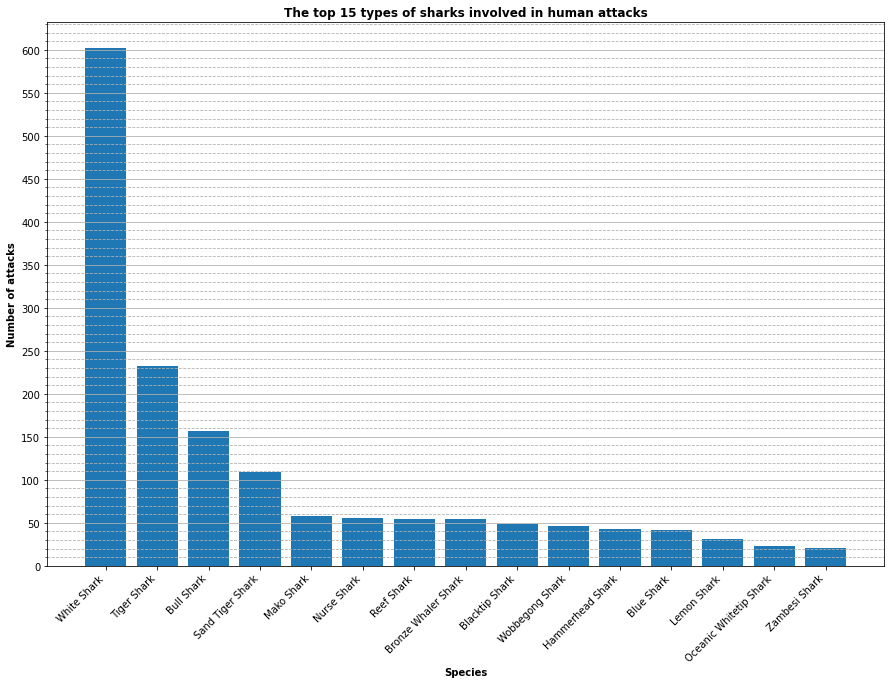

In [336]:
# Make bar chart with top 15 shark attack types/species
df_species_freq = pd.DataFrame(df8.loc[:,'Species'].value_counts().head(15))
df_species_freq1 = df_species_freq.reset_index()
df_species_freq2 = df_species_freq1.rename(columns = {'index': 'Species','Species': 'Frequency'} )

# display(df_species_freq2)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots()

ax.bar(df_species_freq2['Species'], df_species_freq2['Frequency'])
ax.set_xlabel('Species', fontweight = 'bold')
ax.set_ylabel('Number of attacks', fontweight = 'bold')
ax.set_title ('The top 15 types of sharks involved in human attacks', fontweight = 'bold')
fig.set_size_inches(15, 10)
plt.xticks(ha = 'right', rotation =45)
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(10))
plt.grid(axis ='y', which = 'major')
plt.grid(axis ='y', which = 'minor', linestyle= '--')

**1. What is the most dangerous type of sharks to humans?**

To answer this question the column 'Species' has been cleaned up and data have been transformed:

- Rows with missing values have been removed. 

- Based on the information in the 'Species" column, data have been transformed to a certain shark species/type when possible. Since there are more than a 1000 shark species, this transformation process has only been performed for the most frequent observed species. Information about shark species was gathered from [sharks.org](https://www.sharks.org) / [Wikipedia](https://en.wikipedia.org/wiki/Main_Page).

This cleaning and transformation process might have caused a bias if (a) certain species is/are not recognised more often than other species.
Since these data have not always been based on observations by shark specialists, it is likely that not every observation is correct in the first place. 

**Conclusion:**

Based on the cleaned and transformed data, the *White Shark* is the  shark type (species) that is most often involved in attacks of humans, followed by the *Tiger Shark* and the *Bull Shark*. 

In [337]:
# 2. Are children more likely to be attacked by sharks?

# Look at 'Age' column and make a division between child (age = 0-17) and adult (age >= 18)
display(df3)

Date    Year  ... Fatal (Y/N)          Species
0     25-Jun-2018  2018.0  ...           N      White shark
1     18-Jun-2018  2018.0  ...           N              NaN
2     09-Jun-2018  2018.0  ...           N              NaN
3     08-Jun-2018  2018.0  ...           N        2 m shark
4     04-Jun-2018  2018.0  ...           N  Tiger shark, 3m
...           ...     ...  ...         ...              ...
6297  Before 1903     0.0  ...           Y              NaN
6298  Before 1903     0.0  ...           Y              NaN
6299    1900-1905     0.0  ...           Y              NaN
6300    1883-1889     0.0  ...           Y              NaN
6301    1845-1853     0.0  ...           Y              NaN

[6302 rows x 11 columns]

In [338]:
# Get an overview of the data in the 'Age' column and find non default missing values
find_non_default_missing_values(df3, 'Age', 'string')



********************************************************************************
Finding non default missing values for column "Age"
********************************************************************************
The datatype for Age is object


----------------------------------------
1: Looking at unique values
----------------------------------------
The number of unique values in Age is 158.
List of unique values could not be sorted: '<' not supported between instances of 'float' and 'str'


array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  



----------------------------------------
2: Sorting and looking at the edges
----------------------------------------


3108                
1825                
5084                
2434              28
2259              30
4405              43
4064    "middle-age"
4447         "young"
3802         (adult)
6019               1
Name: Age, dtype: object

6291    NaN
6292    NaN
6293    NaN
6294    NaN
6295    NaN
6296    NaN
6297    NaN
6298    NaN
6299    NaN
6300    NaN
Name: Age, dtype: object

The number of NULL values is 2831.


----------------------------------------
3: Casting to type: string
----------------------------------------
Casting "Age" to "string" was succesful


----------------------------------------
4: Looking at frequencies
----------------------------------------


NaN         2831
17           154
18           150
19           142
20           141
            ... 
23 & 20        1
82             1
30 or 36       1
? & 19         1
17 & 16        1
Name: Age, Length: 158, dtype: int64

In [339]:
# Clean up 'Age' column

# Remove null values, because it is impossible to determine whether a null value is an adult or a child 
# (although if it would have been a child I think it is more likely it would have been reported)

df4_Age = df3.dropna(subset=['Age'], how='all')

# display(df4_Age)


# Remove empty strings

df4_Age['Age'] = df4_Age.loc[:, 'Age'].str.strip()
df5_Age = df4_Age[df4_Age['Age'] != '']

# display(df5_Age)

# Remove strings with ....
df6_Age = df5_Age[~df5_Age['Age'].str.contains('MAKE LINE GREEN|A.M.|\xa0 |X|F')]

# display(df6_Age)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [340]:
# Transform data to be able to convert to 'child' or 'adult'

# remove 's' (to get rid of 20s, 30s etc.), 'mid-' , '½' , 'Ca'. , 'Both'
df6_Age['Age']= df6_Age['Age'].str.replace('s|mid\-|½|Ca.|Both|\?|>|\'', '')

# if age contains months or teen or young -> transform to 'child'. Note: there is a chance that 'young' is a young adult, but since there are only three observations of these this will probably not significantly change the outcome
# if age contains teen -> transform 'child'. Note: there is a chance that teen is 18 or 19, so this might cause a bias (minor because only 15 observations were 'teen'). 
# if age contains adult -> tranform to 'adult'
# if age contains elderly -> transform to 'adult'
# if age contains middle-age -> transform to 'adult'

def replace_age(df, column, substring, replacement):
  mask = df[column].str.contains(substring)
  df.loc[mask, column] = replacement
  
replace_age(df6_Age, 'Age', 'month|teen|Teen|\"young\"|young', 'child')
replace_age(df6_Age, 'Age', 'Elderly|\"middle-age\"|\(adult\)', 'adult')

unique_values(df6_Age, 'Age')

# display(df6_Age)


The number of unique values in Age is 123.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


array(['    &   14', ' & 19', ' 11', ' 33', '1', '10', '10 or 12', '11',
       '12', '12 or 13', '13', '13 or 14', '13 or 18', '14', '15', '16',
       '16 to 18', '17', '17 & 16', '17 & 35', '18', '18 or 20',
       '18 to 22', '19', '2', '20', '21', '21 & ', '21 or 26',
       '21, 34,24 & 35', '22', '23', '23 & 20', '23 & 26', '24', '25',
       '25 or 28', '25 to 35', '26', '27', '28', '28 & 26', '28, 23 & 30',
       '29', '3', '30', '30 & 32', '30 or 36', '31', '31 or 33', '32',
       '32 & 30', '33', '33 & 26', '33 & 37', '33 or 37', '34', '34 & 19',
       '35', '36', '36 & 23', '36 & 26', '37', '37, 67, 35, 27,   & 27',
       '38', '39', '40', '41', '42', '43', '44', '45', '46', '46 & 34',
       '47', '48', '49', '5', '50', '50 & 30', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '7', '7      &    31', '7 or 8',
       '70', '71', '72', '73', '74', '75', '77', '78', '8', '8 or 10',
     

['\\b0\\b', '\\b1\\b', '\\b2\\b', '\\b3\\b', '\\b4\\b', '\\b5\\b', '\\b6\\b', '\\b7\\b', '\\b8\\b', '\\b9\\b', '\\b10\\b', '\\b11\\b', '\\b12\\b', '\\b13\\b', '\\b14\\b', '\\b15\\b', '\\b16\\b', '\\b17\\b']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Shark attacks on adults and children')

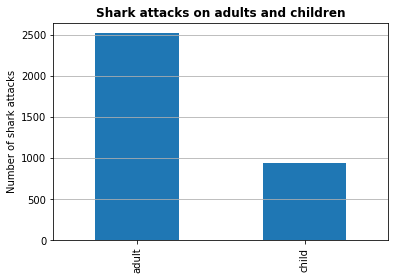

In [341]:
child_ages = [r'\b0\b', r'\b1\b', r'\b2\b', r'\b3\b', r'\b4\b',r'\b5\b', r'\b6\b', r'\b7\b', r'\b8\b', r'\b9\b', r'\b10\b', r'\b11\b', r'\b12\b', r'\b13\b', r'\b14\b', r'\b15\b', r'\b16\b', r'\b17\b']
print(child_ages)

for x in child_ages:
  replace_age(df6_Age, 'Age', x, 'child')

df6_Age['Age'] = df6_Age.transform({'Age': lambda Age: 'adult' if ('child' not in Age ) else Age})             


# df6_Age['Age'] = np.where(~df['Age'].str.contains('child'), 'adult', df6_Age['Age'])
# display(df6_Age)

# looking_at_frequencies(df6_Age, 'Age')

df6_Age.Age.value_counts().plot(kind='bar')
plt.ylabel('Number of shark attacks')
plt.grid(axis='y')
plt.title('Shark attacks on adults and children', fontweight='bold')


**2. Are children more likely to be attacked by sharks?**

To answer this question the column 'Age' has been cleaned up and data have been transformed:

- Rows with missing values or uncertain observations have been removed, because it is impossible to determine whether there would be an adult or a child involved. (although if it would have been a child I think it is more likely it would have been reported)

- Based on the information in the 'Age' column, data have been transformed to 'child' (age = 0-17) or 'adult' (age >= 18). 


**Conclusion:**

Based on the cleaned and transformed data, adults are more likely to be attacked by sharks than children, so the answer is no.



In [342]:
# 3. Are shark attacks where sharks were provoked more or less dangerous?

# Look at column 'Type' and 'Fatal'
display(df3.columns)

df3 = df3.rename(columns={'Fatal (Y/N)': 'Fatal'})
display(df3.columns)
# Get an overview of the data in the 'Type and 'Fatal' column and find non default missing values
find_non_default_missing_values(df3, 'Type', 'string')
find_non_default_missing_values(df3, 'Fatal', 'bool')

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal (Y/N)', 'Species'],
      dtype='object')

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Activity', 'Sex', 'Age',
       'Injury', 'Fatal', 'Species'],
      dtype='object')



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
The datatype for Type is object


----------------------------------------
1: Looking at unique values
----------------------------------------
The number of unique values in Type is 9.
List of unique values could not be sorted: '<' not supported between instances of 'float' and 'str'


array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       'Sea Disaster', nan, 'Boat', 'Boatomg'], dtype=object)



----------------------------------------
2: Sorting and looking at the edges
----------------------------------------


4022    Boat
4188    Boat
3024    Boat
2664    Boat
4179    Boat
1528    Boat
1522    Boat
1519    Boat
864     Boat
3926    Boat
Name: Type, dtype: object

2325    Unprovoked
2323    Unprovoked
2322    Unprovoked
2321    Unprovoked
2331    Unprovoked
6301    Unprovoked
85             NaN
382            NaN
4867           NaN
5705           NaN
Name: Type, dtype: object

The number of NULL values is 4.


----------------------------------------
3: Casting to type: string
----------------------------------------
Casting "Type" to "string" was succesful


----------------------------------------
4: Looking at frequencies
----------------------------------------


Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
NaN                4
Questionable       2
Boatomg            1
Name: Type, dtype: int64



********************************************************************************
Finding non default missing values for column "Fatal"
********************************************************************************
The datatype for Fatal is object


----------------------------------------
1: Looking at unique values
----------------------------------------
The number of unique values in Fatal is 9.
List of unique values could not be sorted: '<' not supported between instances of 'float' and 'str'


array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)



----------------------------------------
2: Sorting and looking at the edges
----------------------------------------


3948       N
3951       N
3946       N
3944       N
3942       N
3956       N
3949       N
786     2017
285        M
3469       N
Name: Fatal, dtype: object

6110    NaN
6111    NaN
6122    NaN
6125    NaN
6126    NaN
6147    NaN
6157    NaN
6158    NaN
6164    NaN
6232    NaN
Name: Fatal, dtype: object

The number of NULL values is 539.


----------------------------------------
3: Casting to type: bool
----------------------------------------
Casting "Fatal" to "bool" was succesful


----------------------------------------
4: Looking at frequencies
----------------------------------------


N          4293
Y          1388
NaN         539
UNKNOWN      71
 N            7
N             1
M             1
2017          1
y             1
Name: Fatal, dtype: int64

In [343]:
# Setting null values 
# For 'Type': Replace Boating, Invalid, Questionable, Sea Disaster, Boat and Boatomg with None, so we can drop them at once, since we don't know if these were provoked events or not.
# For Fatal (Y/N): Replace 'M', 'UNKNOWN', '2017' with None, replace ' N', 'N ', 'y', with 'N' and 'Y'

df_provoked = df3.loc[:, ['Type', 'Fatal']]

df_provoked['Type'].replace({'Boating': None, 'Invalid': None, 'Questionable': None, 'Sea Disaster': None, 'Boat': None, 'Boatomg': None }, inplace=True)
df_provoked['Fatal'].replace({'M': None, 'UNKNOWN': None, '2017': None, ' N': 'N', 'N ': 'N', 'y': 'Y'}, inplace = True)

# Remove null values

df1_provoked = df_provoked.dropna()


# Transform 'Yes' into 1 and 'No' into 0

# df1_provoked['Fatal'].replace({'Y': 1, 'N': 0}, inplace = True)

# display(df1_provoked)



Fatal          N     Y
Type                  
Provoked     548    19
Unprovoked  3351  1181

The number of unprovoked shark attacks is 4532. The percentage of unprovoked fatal attacks is 26.059135039717564
The number of provoked shark attacks is 567. The percentage of provoked fatal attack is 3.3509700176366843


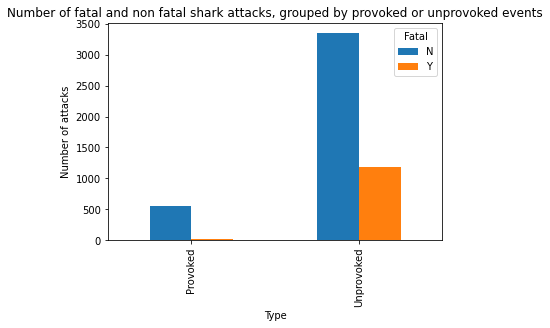

In [344]:
grouped=pd.crosstab(index=df1_provoked['Type'],columns=df1_provoked['Fatal'])
display(CrosstabResult)

grouped.plot.bar()
plt.title('Number of fatal and non fatal shark attacks, grouped by provoked or unprovoked events')
plt.ylabel('Number of attacks')

number_of_unprovoked_shark_attacks = grouped.loc['Unprovoked', 'Y'] + grouped.loc['Unprovoked', 'N']
number_of_provoked_shark_attacks = grouped.loc['Provoked', 'Y'] + grouped.loc['Provoked', 'N']
percentage_unprovoked = grouped.loc['Unprovoked', 'Y']/(grouped.loc['Unprovoked', 'Y'] + grouped.loc['Unprovoked', 'N']) *100
percentage_provoked = grouped.loc['Provoked', 'Y']/(grouped.loc['Provoked', 'Y'] + grouped.loc['Provoked', 'N']) *100

print(f'The number of unprovoked shark attacks is {number_of_unprovoked_shark_attacks}. The percentage of unprovoked fatal attacks is {percentage_unprovoked}')
print(f'The number of provoked shark attacks is {number_of_provoked_shark_attacks}. The percentage of provoked fatal attack is {percentage_provoked}')


**3. Are shark attacks where sharks were provoked more or less dangerous?**

To answer this question the columns 'Type' and 'Fatal' have been cleaned up:
Rows with missing values or uncertain observations have been removed, because we don't know whether sharks were provoked in these attacks. 

Data have been grouped and plotted in a bar chart.

**Conclusion**:
The number of shark attacks where sharks were provoked is much higher than where sharks were not provoked (567 vs 4532). The percentage of provoked shark attacks that were fatal is 3.33%, where the percentage of fatal unprovoked shark attacks is 26%. So based on these numbers it seems that provoked shark attacks are less dangerous than unprovoked shark attacks.

In [345]:
# 4. Are certain activities more likely to result in a shark attack?
# Look at column 'Activity'

find_non_default_missing_values(df3, 'Activity', 'string')




********************************************************************************
Finding non default missing values for column "Activity"
********************************************************************************
The datatype for Activity is object


----------------------------------------
1: Looking at unique values
----------------------------------------
The number of unique values in Activity is 1533.


----------------------------------------
2: Sorting and looking at the edges
----------------------------------------


5560                                                     
2511                                                     
5683     a canoe was pursuing a schooner that had forc...
5639                                      "Boat accident"
4140    "Climbing up to ship after repairing the stern...
5640                                 "Crossing the river"
4279    "Flying Tiger" transport plane went down with ...
4278    "Flying Tiger" transport plane went down with ...
2360                            "Riding waves on a board"
5268                                "Swimming vigorously"
Name: Activity, dtype: object

6244    NaN
6245    NaN
6252    NaN
6258    NaN
6263    NaN
6269    NaN
6277    NaN
6282    NaN
6292    NaN
6300    NaN
Name: Activity, dtype: object

The number of NULL values is 544.


----------------------------------------
3: Casting to type: string
----------------------------------------
Casting "Activity" to "string" was succesful


----------------------------------------
4: Looking at frequencies
----------------------------------------


Surfing                                                                        971
Swimming                                                                       869
NaN                                                                            544
Fishing                                                                        431
Spearfishing                                                                   333
                                                                              ... 
Boat capsized                                                                    1
Swimming ashore from fishing boat swamped and sunk by a squall                   1
Bathing near whaling ship (bark A. R. Tucker of New Bedford, Massachusetts)      1
Free diving for abalone (surfacing)                                              1
Hookah diving (submerged)                                                        1
Name: Activity, Length: 1533, dtype: int64

In [352]:
# Drop rows with null values

df_activities = df3.dropna(subset = ['Activity'])
display(df_activities)
# Look at most frequent activities
looking_at_frequencies_top50(df_activities, 'Activity')

Date  ...                                            Species
0     25-Jun-2018  ...                                        White shark
1     18-Jun-2018  ...                                                NaN
2     09-Jun-2018  ...                                                NaN
3     08-Jun-2018  ...                                          2 m shark
4     04-Jun-2018  ...                                    Tiger shark, 3m
...           ...  ...                                                ...
6296  Before 1906  ...  Said to involve a grey nurse shark that leapt ...
6297  Before 1903  ...                                                NaN
6298  Before 1903  ...                                                NaN
6299    1900-1905  ...                                                NaN
6301    1845-1853  ...                                                NaN

[5758 rows x 11 columns]

Surfing                           971
Swimming                          869
Fishing                           431
Spearfishing                      333
Bathing                           162
Wading                            149
Diving                            127
Standing                           99
Snorkeling                         89
Scuba diving                       76
Body boarding                      61
Body surfing                       49
Swimming                           47
Kayaking                           33
Treading water                     32
Pearl diving                       32
Fell overboard                     32
Free diving                        29
Boogie boarding                    29
Windsurfing                        19
Walking                            17
Boogie Boarding                    16
Shark fishing                      15
Floating                           14
Fishing                            13
Canoeing                           13
Surf-skiing 

In [355]:
# Transform data

def replace_activities(df, column, substring, replacement):
  mask = df[column].str.contains(substring)
  df.loc[mask, column] = replacement

replace_activities(df_activities, 'Activity', r'\bSwimming|\bswimming\b', 'Swimming')
replace_activities(df_activities, 'Activity', 'surfing|Surfing', 'Surfing')
replace_activities(df_activities, 'Activity', r'\bWading\b|\bwading\b', 'Wading')
replace_activities(df_activities, 'Activity', 'diving|Diving', 'Diving') #involved different form of diving, incl scuba diving, free diving, etc.
replace_activities(df_activities, 'Activity', 'fishing|Fishing', 'Fishing') #involves different forms of fishing, incl spearfishing
replace_activities(df_activities, 'Activity', 'snorkeling|Snorkeling', 'Snorkeling') 
replace_activities(df_activities, 'Activity', 'kayaking|Kayaking', 'Kayaking') 
replace_activities(df_activities, 'Activity', 'bathing|Bathing', 'Bathing') 


display(df_activities.loc[:,'Activity'].value_counts().head(20))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Surfing            1120
Swimming           1117
Fishing            1111
Diving              575
Bathing             190
Wading              168
Standing             99
Snorkeling           95
Body boarding        61
Kayaking             36
Fell overboard       32
Treading water       32
Boogie boarding      29
Walking              17
Boogie Boarding      16
Floating             14
Canoeing             13
Surf skiing          12
Rowing               12
Surf-skiing          12
Name: Activity, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

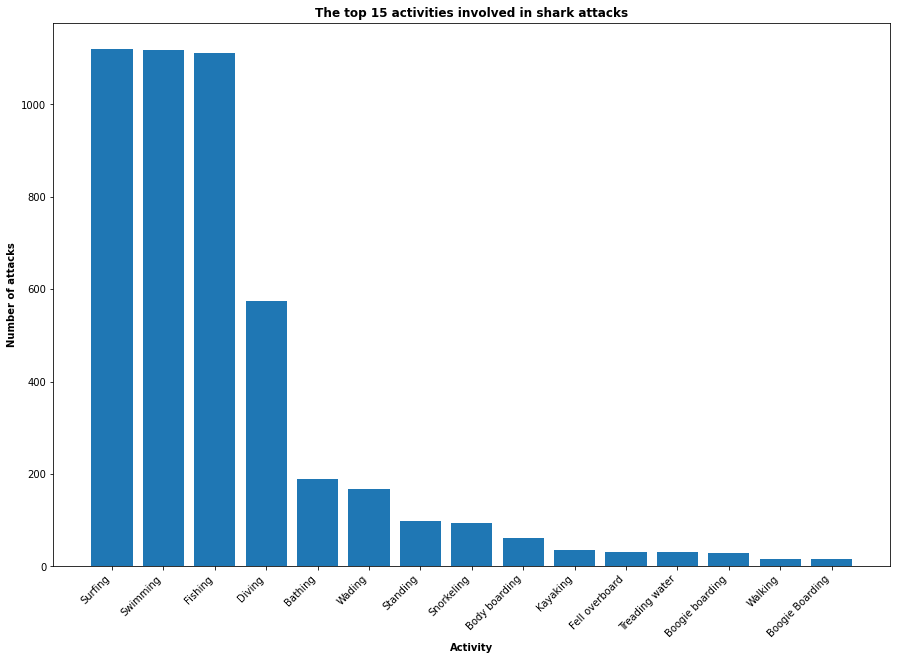

In [364]:
# Make bar chart with top 15 activites involved in shark attacks
df_activities_freq = pd.DataFrame(df_activities.loc[:,'Activity'].value_counts().head(15))
df_activities_freq1 = df_activities_freq.reset_index()
df_activities_freq2 = df_activities_freq1.rename(columns = {'index': 'Activity','Activity': 'Frequency'} )

# Plot
fig, ax = plt.subplots()

ax.bar(df_activities_freq2['Activity'], df_activities_freq2['Frequency'])
ax.set_xlabel('Activity', fontweight = 'bold')
ax.set_ylabel('Number of attacks', fontweight = 'bold')
ax.set_title ('The top 15 activities involved in shark attacks', fontweight = 'bold')
fig.set_size_inches(15, 10)
plt.xticks(ha = 'right', rotation =45)


**4. Are certain activities more likely to result in a shark attack?**

To answer this question the columns 'Activity' has been cleaned up: Rows with missing values or uncertain observations have been removed, because we don't know what kind of activity the attacked person was doing.
Data have been transformed and grouped into 'base' activities, because activities were not always specified further. So it should be noted that for example 'Fishing' includes different forms of fishing, such as spearfishing and 'Diving' includes for example free diving and scuba diving.   

**Conclusion**: 
The activities surfing, swimming and fishing are the most likely to result in a shark attack. The number of attacks caused by these activities are almost similar for this data set. 